<p><span style="font-family: Calibri, sans-serif; font-size: 20px; color: rgb(41, 105, 176);"><strong><u>PROJECT UNSUPERVISED LEARNING - OBJECT RECOGNITION</u></strong></span></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p><span style="color: rgb(0, 0, 0); font-family: Georgia, serif; font-size: 19px;">1. Data pre-processing &ndash; Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm </span></p>

In [2]:
df = pd.read_csv('vehicle.csv')

In [3]:
df.shape

(846, 19)

In [4]:
#List of columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [6]:
#replacing bus,car and van with 0,1,2 respectively
df['class'].replace('bus',0,inplace=True)
df['class'].replace('car',1,inplace=True)
df['class'].replace('van',2,inplace=True)

In [7]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [8]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        845.000000     846.000000  846.000000  
mean         188.919527     195.632388    0.977541  
std            6.155809       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [9]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
#we have total 41 datum values as null.
df.isnull().sum().sum()

41

In [11]:
#dropping rows with null values
df.dropna(how='any',axis=0,inplace=True)

In [12]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        813.000000     813.000000  813.000000  
mean         188.979090     195.729397    0.987700  
std            6.153681       7.398781    0.701754  
min          176.000000     181.000000    0.000000  
25%          184.000000     191.000000    0.000000  
50%          189.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [13]:
#The data has 813 rows/obsevations and 19 columns/attributes.
#All the independent variables are continuous in nature and no null value is present(already dropped).
df.shape

(813, 19)

<p><span style="font-family: Georgia, serif; font-size: 19px;">2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why </span></p>

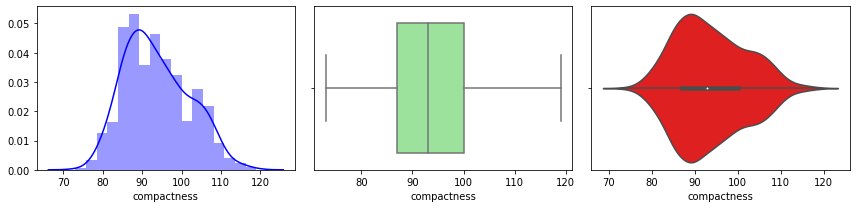

In [14]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['compactness'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['compactness'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['compactness'],color='red')
plt.tight_layout()
plt.show()

In [15]:
df['compactness'].skew(),df['compactness'].kurtosis()

(0.38604759217896134, -0.5113696933553062)

**If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.The distribution of compactness parameter is approximately symmetric and there are no outliers present**

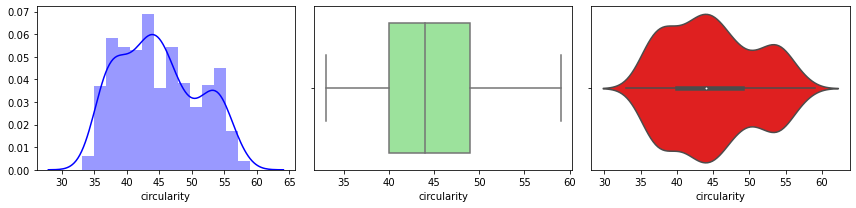

In [16]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['circularity'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['circularity'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['circularity'],color='red')
plt.tight_layout()
plt.show()

In [17]:
df['circularity'].skew(),df['circularity'].kurtosis()

(0.2727230621225907, -0.9212323279027959)

**The distribution of circularity is moderately skewed and we also see at least three peaks in the distribution suggesting that mixing of three different Gaussians i.e. the presence of at least three different target variables.** 

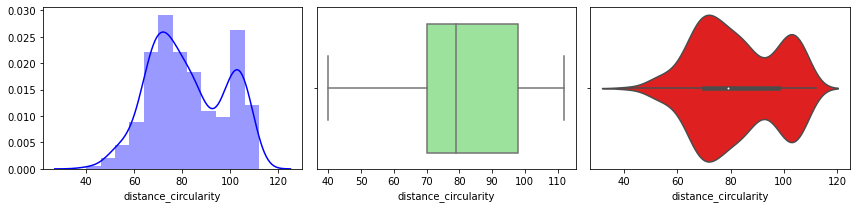

In [18]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['distance_circularity'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['distance_circularity'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['distance_circularity'],color='red')
plt.tight_layout()
plt.show()

In [19]:
df['distance_circularity'].skew(),df['distance_circularity'].kurtosis()

(0.11424421862719482, -0.9670831450276922)

**Highly left skewed sitribution of the the distance and more than one peak in the sistribution.**

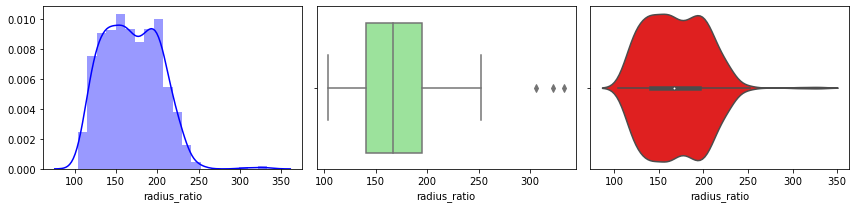

In [20]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['radius_ratio'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['radius_ratio'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['radius_ratio'],color='red')
plt.tight_layout()
plt.show()

**The distribution of radius ratio is highly right skewed and a lot of outliers are present.**

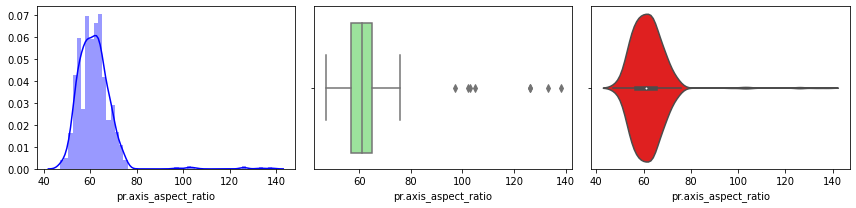

In [21]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['pr.axis_aspect_ratio'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['pr.axis_aspect_ratio'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['pr.axis_aspect_ratio'],color='red')
plt.tight_layout()
plt.show()

In [22]:
df['pr.axis_aspect_ratio'].skew(),df['pr.axis_aspect_ratio'].kurtosis()

(3.832899380531913, 29.57434582637406)

**The pr.axis_aspect_ratio is highly right skewed and a lot of outliers are present. The kurtosis values is also very high suggesting tails are skewed.**

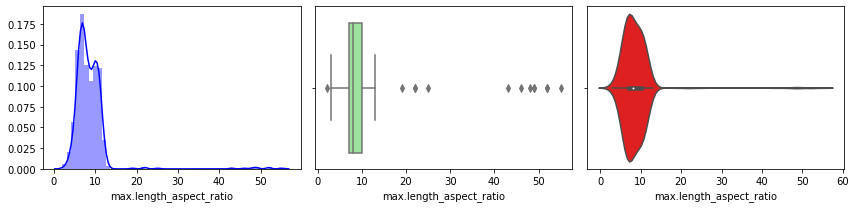

In [23]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['max.length_aspect_ratio'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['max.length_aspect_ratio'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['max.length_aspect_ratio'],color='red')
plt.tight_layout()
plt.show()

**The max.length_aspect_ratio has low variance , right skewness and a lot of outliers**

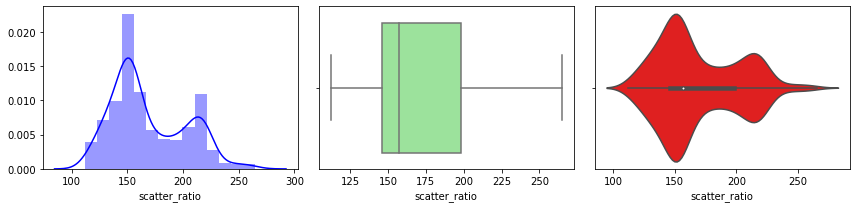

In [24]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['scatter_ratio'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['scatter_ratio'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['scatter_ratio'],color='red')
plt.tight_layout()
plt.show()

**The scatter_ratio has at least two Gaussian and no outliers.**

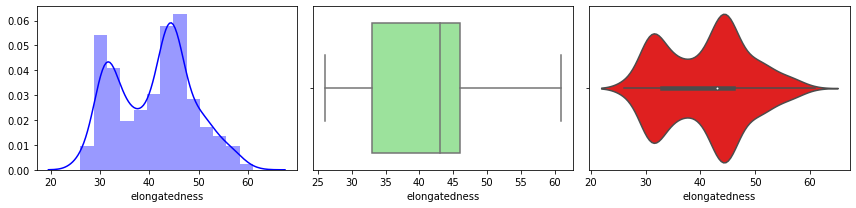

In [25]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['elongatedness'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['elongatedness'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['elongatedness'],color='red')
plt.tight_layout()
plt.show()

**The right skewed elongatedness has no outliers but at least two separate peaks in the distribution.**

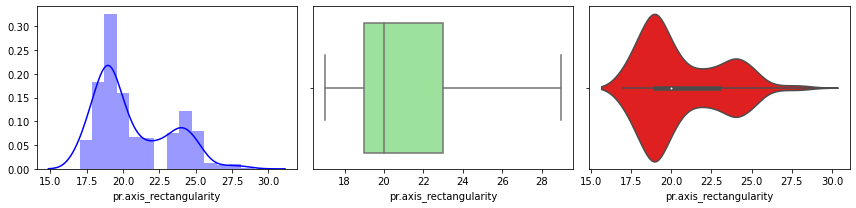

In [26]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['pr.axis_rectangularity'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['pr.axis_rectangularity'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['pr.axis_rectangularity'],color='red')
plt.tight_layout()
plt.show()

**The right skewed pr.axis_rectangularity has no outliers but at least two separate peaks in the distribution and right skewed.**

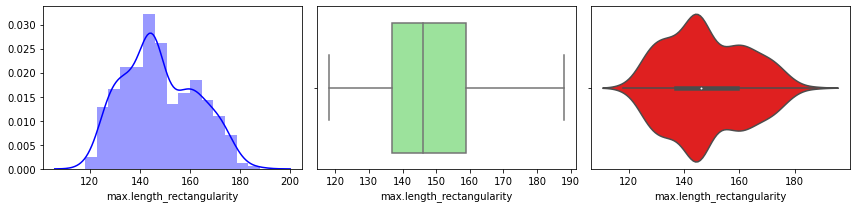

In [27]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['max.length_rectangularity'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['max.length_rectangularity'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['max.length_rectangularity'],color='red')
plt.tight_layout()
plt.show()

**THe max.length_rectangularity has 3 peaks in distribution and no outliers.**

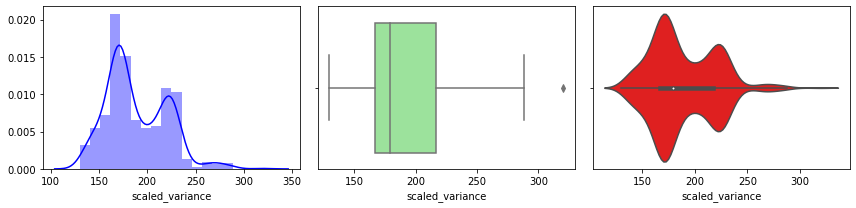

In [28]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['scaled_variance'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['scaled_variance'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['scaled_variance'],color='red')
plt.tight_layout()
plt.show()

**The scaled_variance has few outliers , right skewed and 3 visible peks on the distribution.**

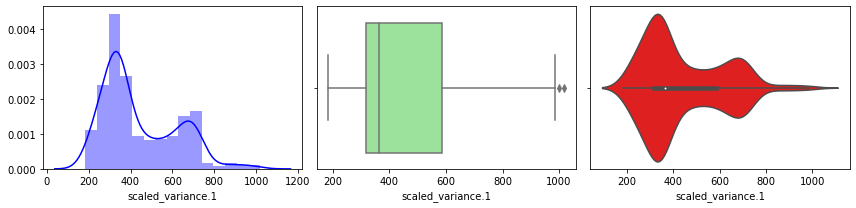

In [29]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['scaled_variance.1'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['scaled_variance.1'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['scaled_variance.1'],color='red')
plt.tight_layout()
plt.show()

**The scaled_variance.1 has few outliers , right skewed and 3 visible peks on the distribution.**

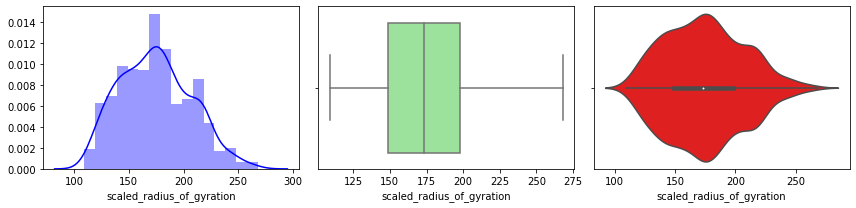

In [30]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['scaled_radius_of_gyration'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['scaled_radius_of_gyration'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['scaled_radius_of_gyration'],color='red')
plt.tight_layout()
plt.show()

In [31]:
df['scaled_radius_of_gyration'].skew(),df['scaled_radius_of_gyration'].kurtosis()

(0.2669434412070237, -0.5324399696916364)

**The scaled_radius_of_gyration has low right skew, moderate kurtosis and three  visible peaks suggesting three different distributions.**

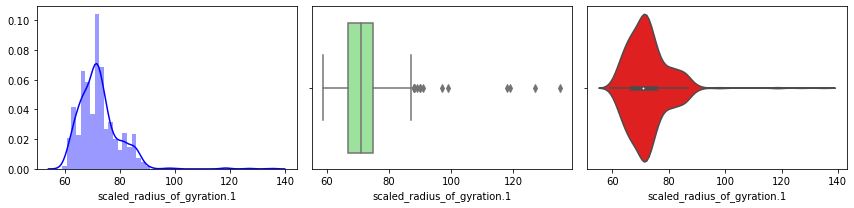

In [32]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['scaled_radius_of_gyration.1'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['scaled_radius_of_gyration.1'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['scaled_radius_of_gyration.1'],color='red')
plt.tight_layout()
plt.show()

In [33]:
df['scaled_radius_of_gyration.1'].skew(),df['scaled_radius_of_gyration.1'].kurtosis()

(2.1567174005031546, 12.030034103862821)

**The scaled_radius_of_gyration.1 is highly right skewed with a lot of outliers.**

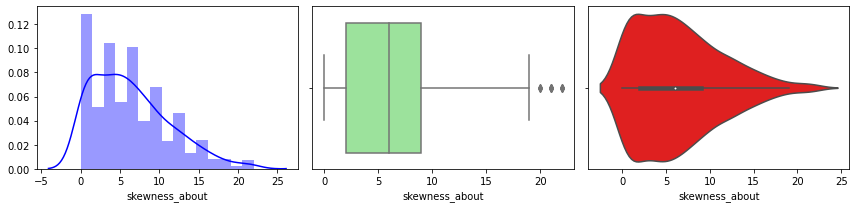

In [34]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['skewness_about'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['skewness_about'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['skewness_about'],color='red')
plt.tight_layout()
plt.show()

In [35]:
df['skewness_about'].skew(),df['skewness_about'].kurtosis()

(0.7827562609968466, 0.12605286339428412)

**The parameter skewness_about is right skewed and has a lot of outliers.**

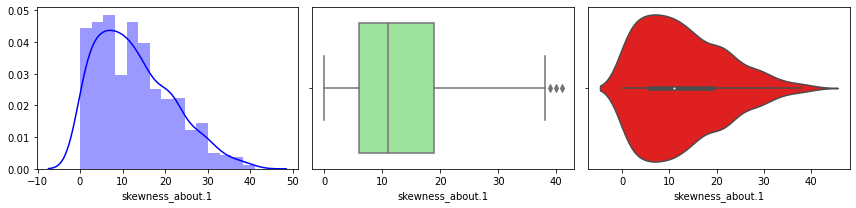

In [36]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['skewness_about.1'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['skewness_about.1'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['skewness_about.1'],color='red')
plt.tight_layout()
plt.show()

In [37]:
df['skewness_about.1'].skew(),df['skewness_about.1'].kurtosis()

(0.6714616168476609, -0.17358897204270818)

**The skewness_about.1 is moderately right skewed with a few outliers.**

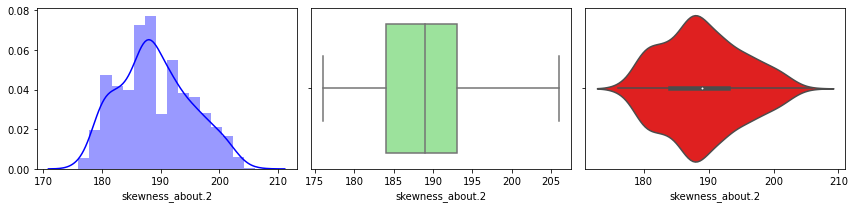

In [38]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['skewness_about.2'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['skewness_about.2'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['skewness_about.2'],color='red')
plt.tight_layout()
plt.show()

In [39]:
df['skewness_about.2'].skew(),df['skewness_about.2'].kurtosis()

(0.2558803246753765, -0.5775691298296759)

**The Skewness_about.2 is right skewed with at least two separate peaks visible in the distribution.**

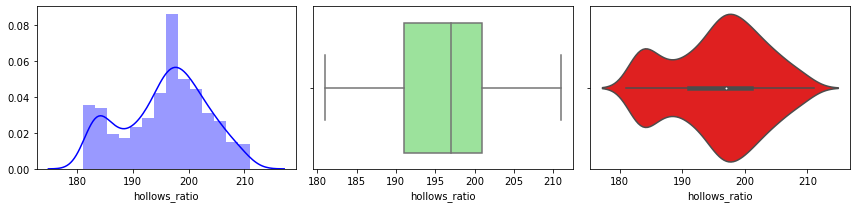

In [40]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
sns.distplot(df['hollows_ratio'],color='blue')
plt.subplot(1,3,2)
sns.boxplot(df['hollows_ratio'],color='lightgreen')
plt.subplot(1,3,3)
sns.violinplot(df['hollows_ratio'],color='red')
plt.tight_layout()
plt.show()

In [41]:
df['hollows_ratio'].skew(),df['hollows_ratio'].kurtosis()

(-0.2299405387202722, -0.7877749157943357)

**Although there are no outliers , the distribution of the hollows_ratio is not normal as evident fro, skew and kurtosis values**

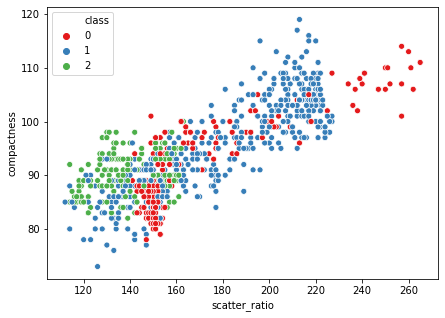

In [42]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['scatter_ratio'],y=df['compactness'],hue=df['class'],palette='Set1')
plt.show()

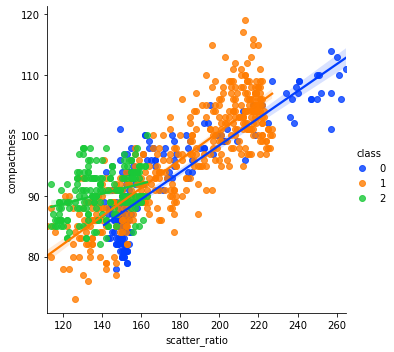

In [43]:
sns.lmplot(x='scatter_ratio',y='compactness',data=df,hue='class',palette='bright')

In [44]:
df['scatter_ratio'].corr(df['compactness'])

0.8140261843942499

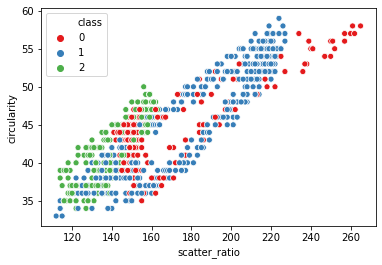

In [45]:
sns.scatterplot(x=df['scatter_ratio'],y=df['circularity'],hue=df['class'],palette='Set1')

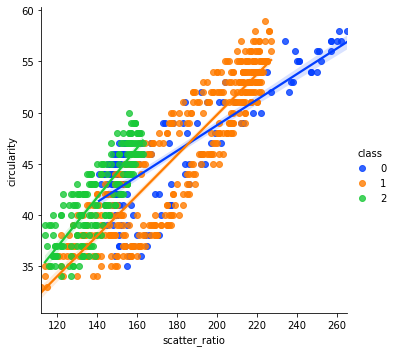

In [46]:
sns.lmplot(x='scatter_ratio',y='circularity',data=df,hue='class',palette='bright')

In [47]:
df['scatter_ratio'].corr(df['circularity'])

0.8581486436378375

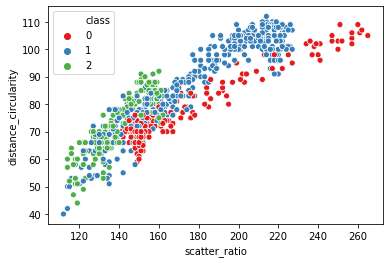

In [48]:
sns.scatterplot(x=df['scatter_ratio'],y=df['distance_circularity'],hue=df['class'],palette='Set1')

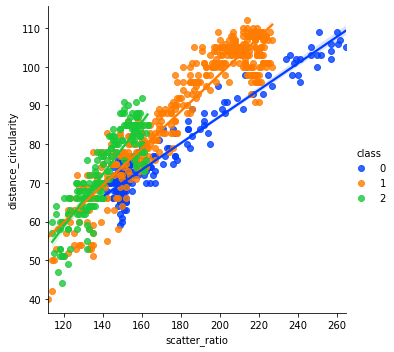

In [49]:
sns.lmplot(x='scatter_ratio',y='distance_circularity',data=df,hue='class',palette='bright')

In [50]:
df['scatter_ratio'].corr(df['distance_circularity'])

0.9090229285823329

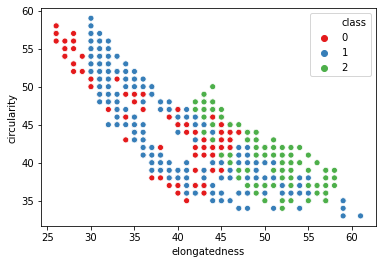

In [51]:
sns.scatterplot(x=df['elongatedness'],y=df['circularity'],hue=df['class'],palette='Set1')

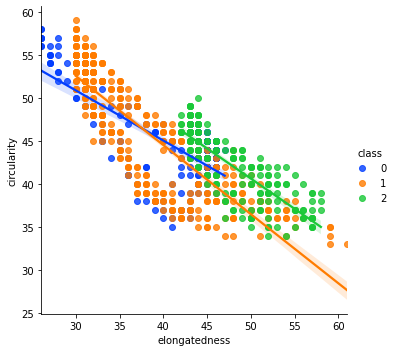

In [52]:
sns.lmplot(x='elongatedness',y='circularity',data=df,hue='class',palette='bright')

In [53]:
df['elongatedness'].corr(df['circularity'])

-0.8251080617971002

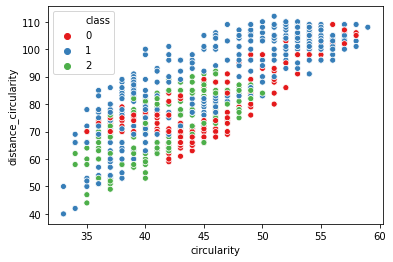

In [54]:
sns.scatterplot(x=df['circularity'],y=df['distance_circularity'],hue=df['class'],palette='Set1')

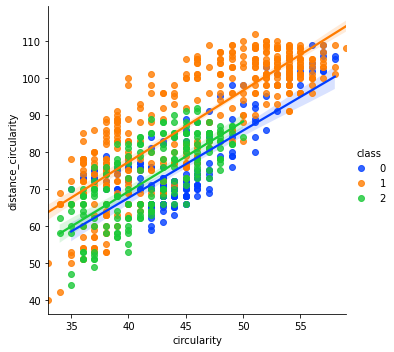

In [55]:
sns.lmplot(x='circularity',y='distance_circularity',data=df,hue='class',palette='bright')

In [56]:
df['circularity'].corr(df['distance_circularity'])

0.7977041673282835

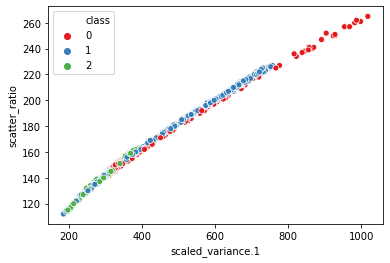

In [57]:
sns.scatterplot(x=df['scaled_variance.1'],y=df['scatter_ratio'],hue=df['class'],palette='Set1')

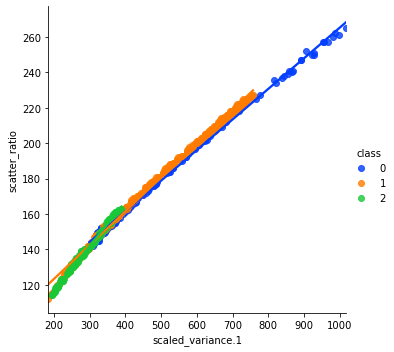

In [58]:
sns.lmplot(x='scaled_variance.1',y='scatter_ratio',data=df,hue='class',palette='bright')

In [59]:
# High correlation between scatter_ratio and scaled_variance.1. 
df['scaled_variance.1'].corr(df['scatter_ratio'])

0.9963955460521814

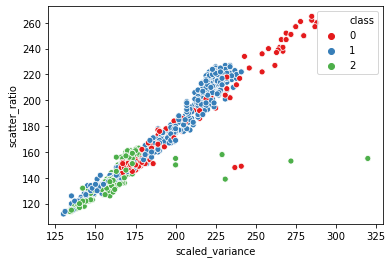

In [60]:
sns.scatterplot(x=df['scaled_variance'],y=df['scatter_ratio'],hue=df['class'],palette='Set1')

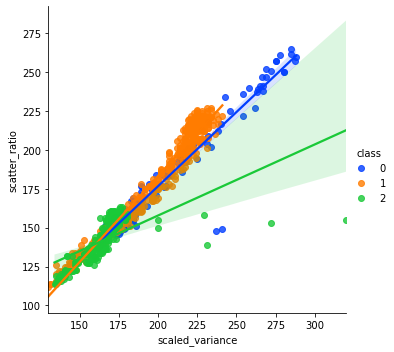

In [61]:
sns.lmplot(x='scaled_variance',y='scatter_ratio',data=df,hue='class',palette='bright')

In [62]:
# High correlation between scatter_ratio and scaled_variance. 
df['scaled_variance'].corr(df['scatter_ratio'])

0.9500674717028142

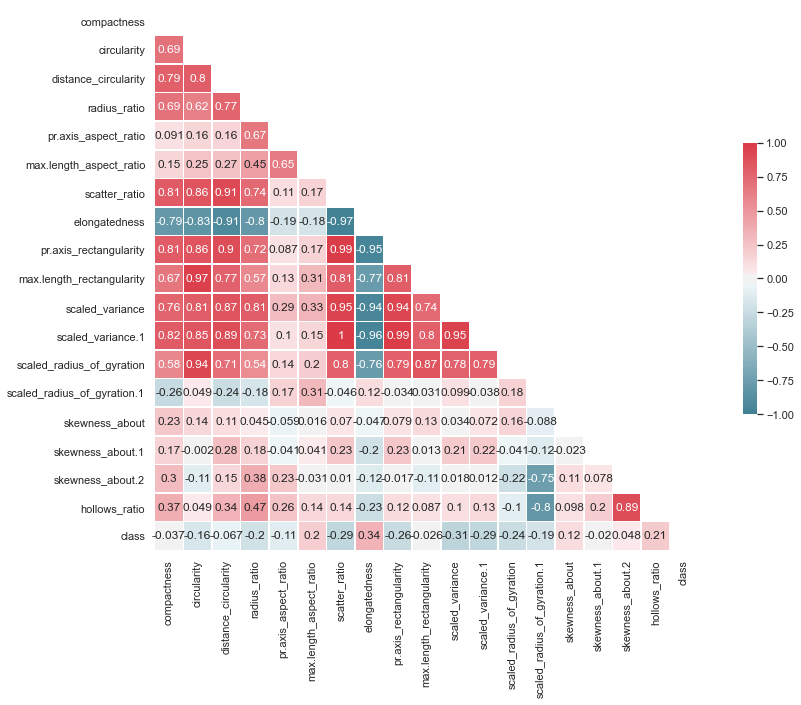

In [63]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

**As we can see that a lot of attributes have very high , positive or negative correlation. As a result of this the final model will be highly biased towards the parameters with high correlation.We should drop the attributes having correlation higher than 0.8**

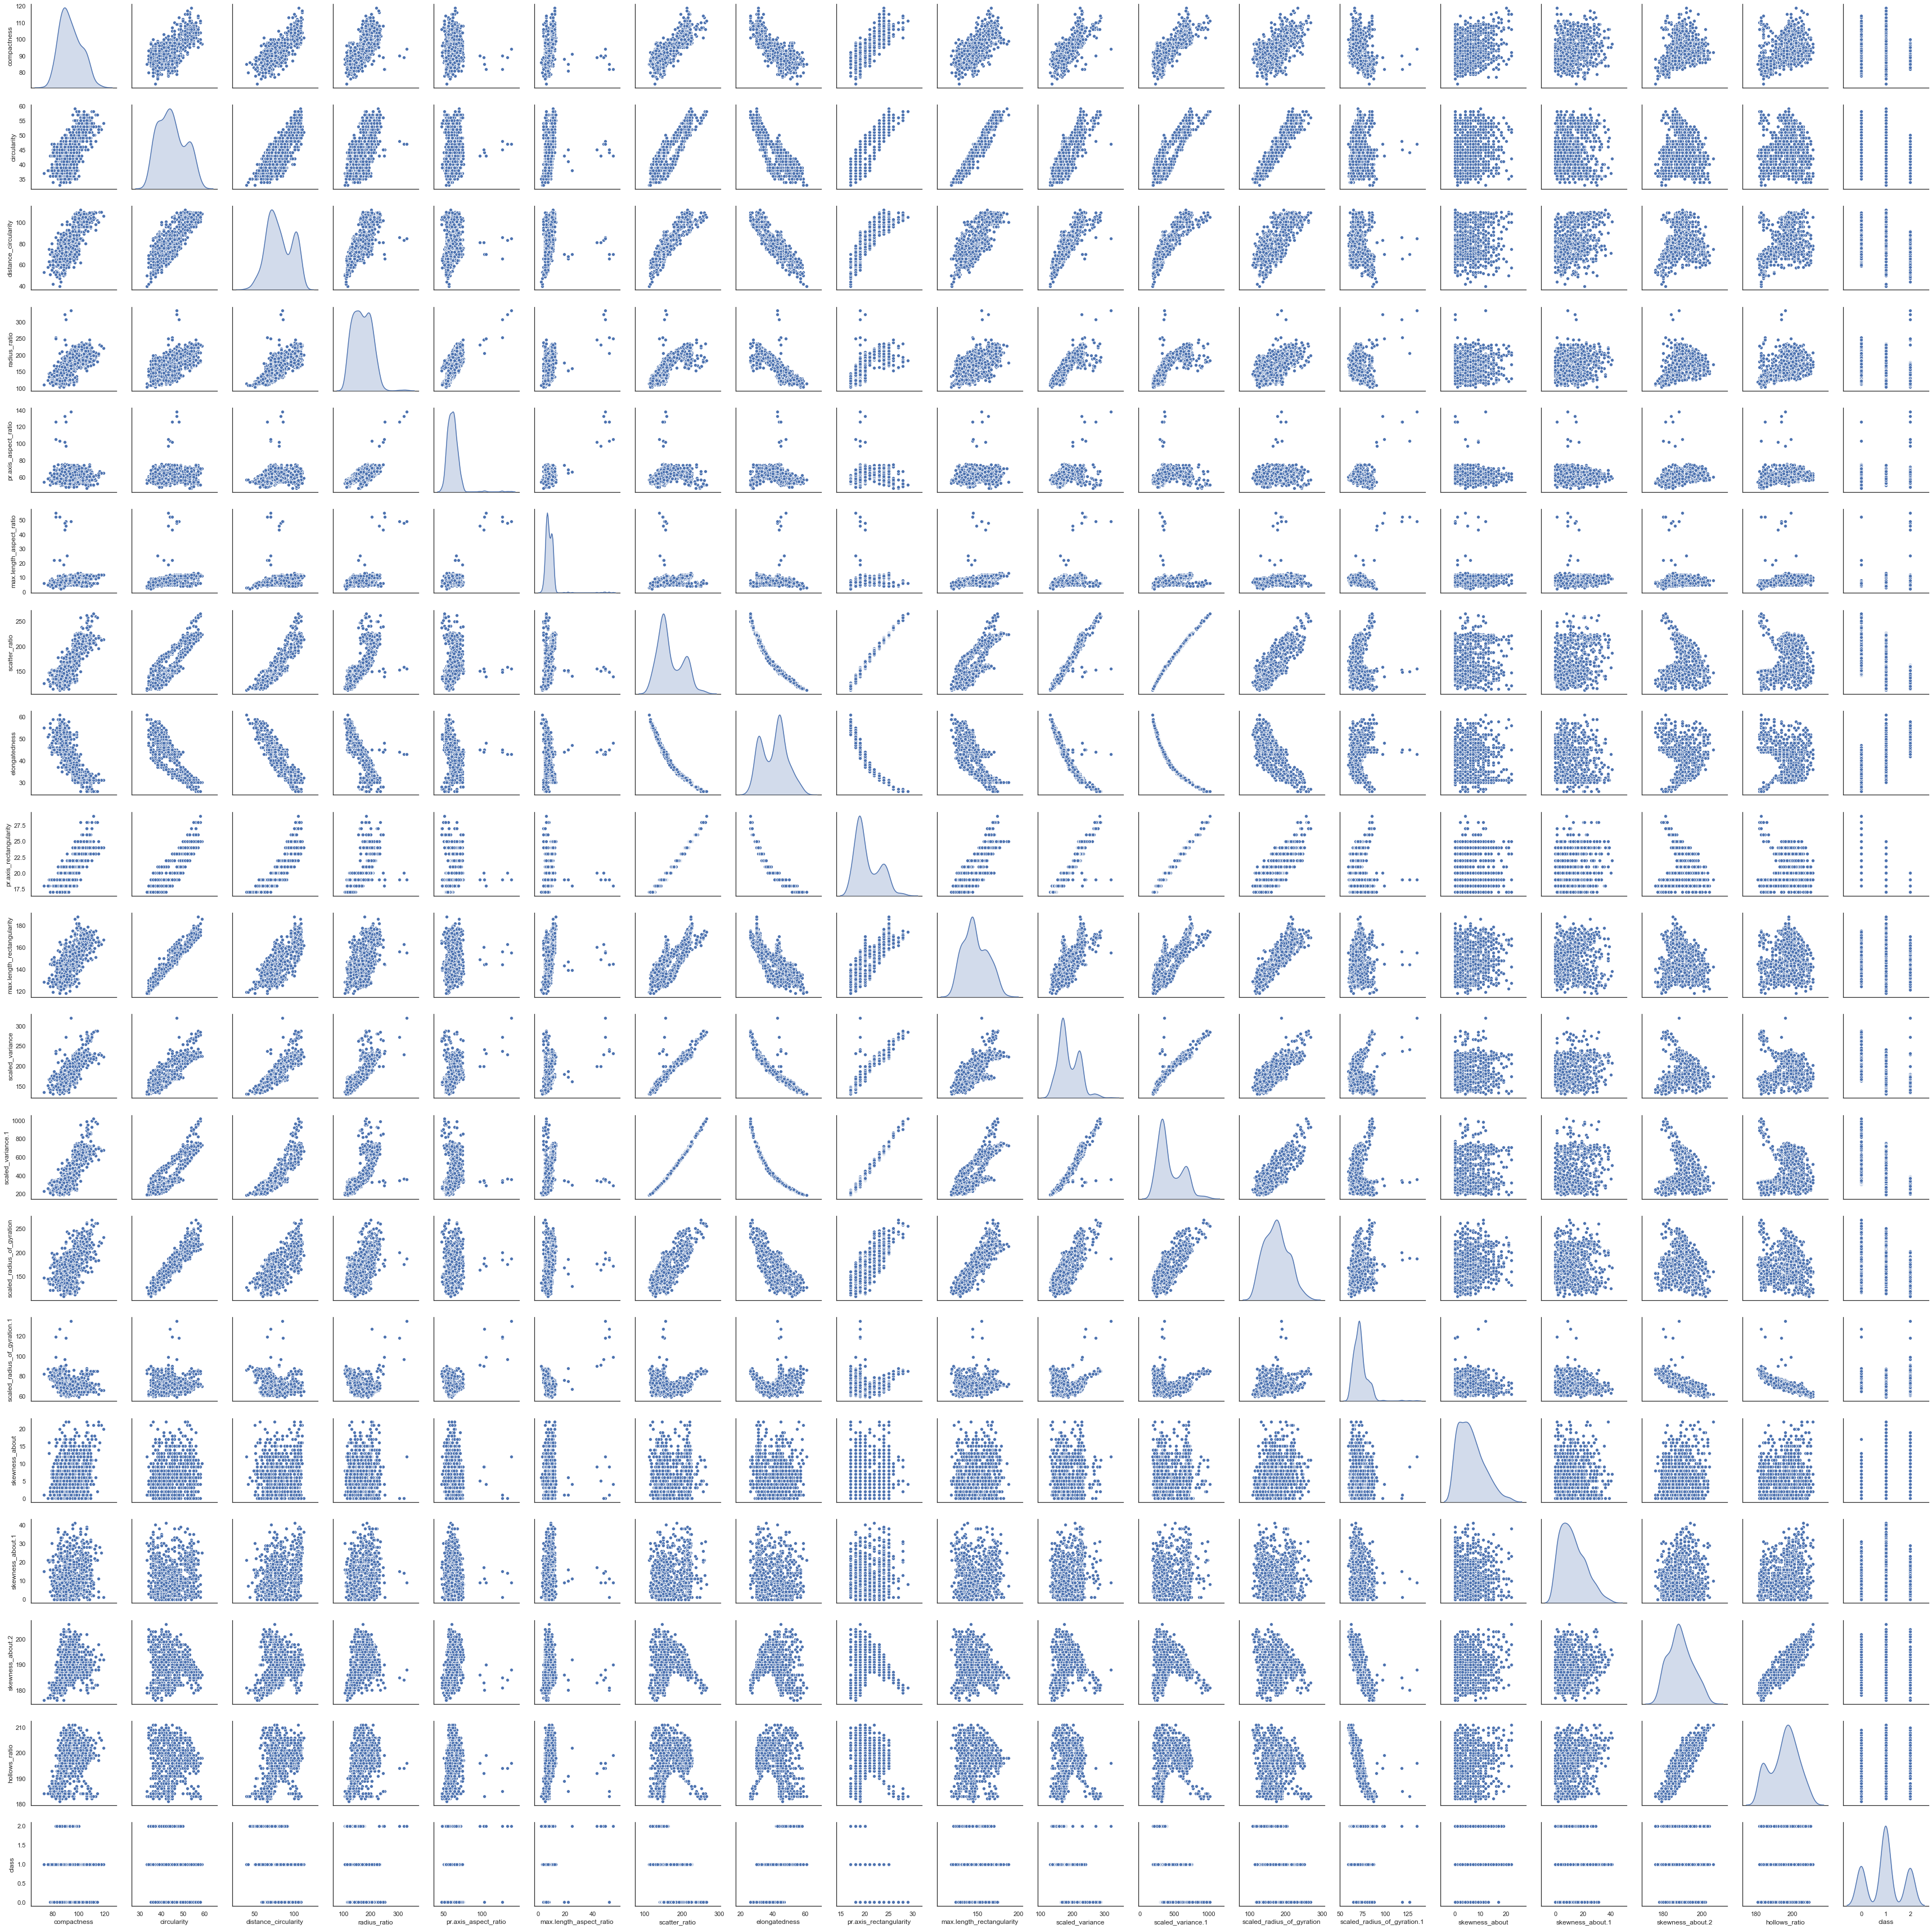

In [64]:
sns.pairplot(df,diag_kind='kde')

<!DOCTYPE html>
<html>

<head>
    <title></title>
</head>

<body>
    <p><span style="color: rgb(41, 105, 176);"><em><span style="font-family: Calibri, sans-serif; font-size: 18px;">Dropping columns having correlation more than 0.8</span></em></span></p>
</body>

</html>

In [65]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [66]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0,vmin=-1.0, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

**None of the remaining 10 attributes have the correlation more than 0.8**

<p><span style="font-family: Georgia, serif; font-size: 19px;">3. Split the data into train and test (Suggestion: specify &ldquo;random state&rdquo; if you are using train_test_split from Sklearn) </span></p>

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X= df.drop(['class'],axis=1)
y= df['class']

In [69]:
X.shape

(813, 10)

In [70]:
#random state
seed=3

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

In [72]:
#Scales the data. Essentially returns the z-scores of every attribute
#This is normalization of independent variables to ensure that different scales do not cause issues in the model.

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
X_train[X_train.columns] = std_scale.fit_transform(X_train[X_train.columns])
X_train.describe()

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cools\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


compactness   circularity  distance_circularity  radius_ratio  \
count  5.690000e+02  5.690000e+02          5.690000e+02  5.690000e+02   
mean  -7.822780e-16 -1.529727e-16         -3.216525e-16  1.288756e-16   
std    1.000880e+00  1.000880e+00          1.000880e+00  1.000880e+00   
min   -2.485696e+00 -1.950246e+00         -2.554885e+00 -1.948365e+00   
25%   -8.072137e-01 -8.187341e-01         -7.875094e-01 -8.315749e-01   
50%   -8.786429e-02 -1.051116e-02         -1.563038e-01 -8.677304e-03   
75%    7.513767e-01  7.977118e-01          9.798663e-01  7.554419e-01   
max    3.029316e+00  2.090868e+00          1.863554e+00  4.781762e+00   

       pr.axis_aspect_ratio  max.length_aspect_ratio  \
count          5.690000e+02             5.690000e+02   
mean           1.777528e-16            -3.153111e-16   
std            1.000880e+00             1.000880e+00   
min           -1.807178e+00            -1.476639e+00   
25%           -5.998466e-01            -3.448939e-01   
50%           -1.169139e-01            -1.185448e-01   
75%            4.867521e-01             3.341533e-01   
max            9.179541e+00             9.840813e+00   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                 5.690000e+02    5.690000e+02      5.690000e+02   
mean                 -8.796908e-16   -2.731656e-17      3.921877e-17   
std                   1.000880e+00    1.000880e+00      1.000880e+00   
min                  -1.803253e+00   -1.309810e+00     -1.422716e+00   
25%                  -7.219188e-01   -8.951885e-01     -8.601547e-01   
50%                  -1.812518e-01   -6.594592e-02     -1.850816e-01   
75%                   3.594153e-01    5.559860e-01      7.150159e-01   
max                   8.469422e+00    3.251024e+00      3.190284e+00   

       skewness_about.2  
count      5.690000e+02  
mean      -1.350219e-15  
std        1.000880e+00  
min       -2.118964e+00  
25%       -6.507980e-01  
50%        1.720171e-03  
75%        6.542383e-01  
max        2.774922e+00

In [74]:
X_test[X_test.columns] = std_scale.fit_transform(X_test[X_test.columns])
X_test.describe()

C:\Users\cools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cools\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


compactness   circularity  distance_circularity  radius_ratio  \
count  2.440000e+02  2.440000e+02          2.440000e+02  2.440000e+02   
mean  -1.028321e-16 -5.560215e-16          2.402450e-16 -1.137524e-16   
std    1.002056e+00  1.002056e+00          1.002056e+00  1.002056e+00   
min   -2.070781e+00 -1.866718e+00         -2.636443e+00 -1.892482e+00   
25%   -6.885437e-01 -8.660315e-01         -7.088799e-01 -8.120758e-01   
50%   -1.859120e-01 -1.989070e-01         -1.627369e-01 -1.329633e-01   
75%    6.936937e-01  6.349987e-01          7.046667e-01  8.316850e-01   
max    2.955537e+00  2.469591e+00          1.861205e+00  2.583486e+00   

       pr.axis_aspect_ratio  max.length_aspect_ratio  \
count          2.440000e+02             2.440000e+02   
mean          -2.387093e-16            -9.395945e-17   
std            1.002056e+00             1.002056e+00   
min           -2.000317e+00            -1.106410e+00   
25%           -6.038154e-01            -3.400111e-01   
50%           -4.521462e-02            -1.484113e-01   
75%            5.133862e-01             2.347883e-01   
max            6.099394e+00             8.856779e+00   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                 2.440000e+02    2.440000e+02      2.440000e+02   
mean                 -5.912848e-16   -8.827183e-17     -8.190170e-17   
std                   1.002056e+00    1.002056e+00      1.002056e+00   
min                  -1.510568e+00   -1.253037e+00     -1.421020e+00   
25%                  -7.249654e-01   -8.633098e-01     -7.542335e-01   
50%                  -7.029642e-02   -2.787189e-01     -1.985784e-01   
75%                   3.225050e-01    6.955993e-01      6.071215e-01   
max                   7.131062e+00    3.033963e+00      2.801959e+00   

       skewness_about.2  
count      2.440000e+02  
mean       1.117777e-15  
std        1.002056e+00  
min       -2.090936e+00  
25%       -7.997286e-01  
50%       -1.541247e-01  
75%        6.528802e-01  
max        2.428291e+00

<p><span style="font-family: Georgia, serif; font-size: 19px;">4. Train a Support vector machine using the train set and get the accuracy on the test set </span></p>

In [75]:
#Support Vector Machine
from sklearn import svm

In [76]:
svm_model = svm.SVC(gamma=0.025, C=3) #instantiate SVM
svm_model.fit(X_train , y_train)
y_pred = svm_model.predict(X_test)

In [77]:
#predict on test
y_predict = svm_model.predict(X_test)

In [78]:
#Accuracy Score
model_score = svm_model.score(X_test, y_test)
print(model_score)

0.9590163934426229


<p><span style="font-family: Georgia, serif; font-size: 19px;">5. Perform K-fold cross validation and get the cross validation score of the model (optional)&nbsp;</span></p>

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [80]:
num_folds = 30

In [81]:
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(svm_model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\cools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.67857143 0.71428571 0.75       0.77777778 0.66666667 0.7037037
 0.85185185 0.77777778 0.81481481 0.7037037  0.7037037  0.77777778
 0.85185185 0.88888889 0.74074074 0.77777778 0.88888889 0.92592593
 0.62962963 0.92592593 0.74074074 0.96296296 0.7037037  0.7037037
 0.77777778 0.7037037  0.7037037  0.81481481 0.85185185 0.66666667]
Accuracy: 77.266% (8.636%)


In [82]:
from sklearn.decomposition import PCA
covMatrix = np.cov(X_train,rowvar=False)
print(covMatrix)

[[ 1.00176056  0.69589544  0.80848852  0.69252549  0.08185937  0.1872193
  -0.24225797  0.21758238  0.18096602  0.29906294]
 [ 0.69589544  1.00176056  0.8074346   0.62539103  0.1408087   0.27161652
   0.06829286  0.12384957 -0.0128034  -0.12597746]
 [ 0.80848852  0.8074346   1.00176056  0.76659487  0.14452011  0.29827387
  -0.20588076  0.10087851  0.27503605  0.12720313]
 [ 0.69252549  0.62539103  0.76659487  1.00176056  0.66855381  0.50257052
  -0.12321764  0.0276162   0.17728755  0.34731931]
 [ 0.08185937  0.1408087   0.14452011  0.66855381  1.00176056  0.67551858
   0.20384922 -0.08166568 -0.04559211  0.21209768]
 [ 0.1872193   0.27161652  0.29827387  0.50257052  0.67551858  1.00176056
   0.28146188  0.0061304   0.05491519 -0.01858287]
 [-0.24225797  0.06829286 -0.20588076 -0.12321764  0.20384922  0.28146188
   1.00176056 -0.10033041 -0.09981872 -0.74134153]
 [ 0.21758238  0.12384957  0.10087851  0.0276162  -0.08166568  0.0061304
  -0.10033041  1.00176056 -0.02972059  0.09853259]
 [

In [83]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
print(pca.explained_variance_)

[3.68132738 2.0085718  1.51173108 1.06177629 0.88916757 0.3610894
 0.25895351 0.12881612 0.08596118 0.03021131]


In [85]:
print(pca.components_)

[[ 0.43853882  0.40167503  0.46625121  0.48777862  0.25095056  0.2696351
  -0.09310522  0.0779897   0.11576109  0.16489945]
 [-0.18228614  0.10037177 -0.074816    0.06620885  0.36010327  0.41955866
   0.61890754 -0.16292038 -0.12336994 -0.46497597]
 [-0.22046038 -0.39937819 -0.25668068  0.16959199  0.52999695  0.27935166
  -0.21826119 -0.17007884 -0.04619944  0.5095239 ]
 [-0.04171636 -0.11861051  0.11870942  0.03196635 -0.08241406 -0.03195423
   0.00952213 -0.6133253   0.75949598 -0.09039705]
 [-0.04668845 -0.22167822 -0.07942663 -0.06703631  0.0428334   0.22779045
   0.12428302  0.73103754  0.57732067 -0.03149607]
 [-0.07487617  0.01758622  0.14827571 -0.32843081 -0.37124871  0.7593467
  -0.35819478 -0.09339495 -0.09690639 -0.0581534 ]
 [ 0.70613849 -0.29101266 -0.22637776 -0.13320617 -0.21428349  0.15605504
   0.42403988 -0.12945497 -0.05911206  0.27812958]
 [ 0.17307373 -0.70031531  0.35386603  0.25925766  0.026223   -0.05035817
  -0.1783265   0.03529603 -0.18979037 -0.46354948]
 [

In [86]:
print(pca.explained_variance_ratio_)

[0.36748576 0.20050418 0.15090743 0.10599102 0.08876049 0.03604548
 0.02584984 0.01285897 0.00858101 0.00301582]


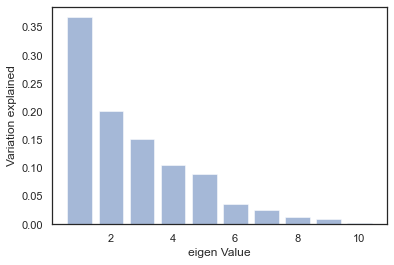

In [87]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

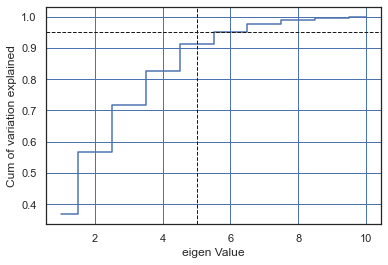

In [88]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.grid(color='b', linestyle='solid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(0.95,color='k', linestyle='dashed', linewidth=1)
plt.axvline(5,color='k', linestyle='dashed', linewidth=1)
plt.show()

**As we can see that 95% variation is explained by 6 principal components, we will use 6 pc for model building.** 

<p><span style="font-size: 19px;"><span style="font-family: Georgia, serif;">6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data &nbsp;</span></span></p>

In [89]:
#using 6 components
pca6 = PCA(n_components=6)
pca6.fit(X)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X)

[[ 0.16338936  0.11162485  0.35394537  0.89889767  0.12993798  0.05543842
  -0.03953871  0.00860805  0.04928146  0.0593809 ]
 [-0.2966067  -0.19194604 -0.66616366  0.28151326  0.47754481  0.13497538
   0.18758209 -0.06846559 -0.25035005  0.05779553]
 [ 0.001906    0.29778897  0.22082722 -0.0616871   0.06229452  0.16491622
   0.66535269 -0.0164452  -0.30186122 -0.54183515]
 [-0.17918001 -0.12538756 -0.03390558  0.01426268  0.11568219  0.11548174
   0.28180016 -0.10337291  0.89419519 -0.18552291]
 [ 0.51212382  0.03483236 -0.28026848 -0.00285777  0.00162691  0.06715938
   0.21907232  0.76064735  0.12814031  0.10221184]
 [-0.48093881 -0.02405688  0.38601825 -0.15213689  0.31775689  0.45072984
  -0.21938952  0.4865462  -0.04158226  0.07244671]]
[0.78181824 0.0835662  0.04923186 0.04136826 0.01523533 0.01136736]


In [90]:
Xpca6

array([[ 1.04605094e+01,  4.55874980e+00, -3.36979052e-02,
         3.48688796e+00,  4.51718621e-02,  2.24701328e+00],
       [-2.59172530e+01, -1.05054443e+01,  7.94929980e-02,
         7.63027016e-01,  1.54985867e-01,  6.38608414e+00],
       [ 4.70458658e+01, -6.12945705e+00,  6.80768287e+00,
        -5.83475751e+00,  4.12704906e+00,  3.72380878e+00],
       ...,
       [ 5.76940410e+01,  1.63186152e+00,  6.72468972e+00,
        -9.98683094e+00, -2.97648806e+00, -4.58132568e+00],
       [-2.41412100e+01, -5.65589554e+00, -1.10263365e+01,
         1.13355097e+01, -7.69366969e+00,  1.80302890e+00],
       [-5.05779378e+01, -2.77683782e+00, -3.85468918e+00,
         7.36745853e+00, -3.92771846e+00, -1.75172462e+00]])

In [91]:
principalDf = pd.DataFrame(data = Xpca6
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6'])

In [92]:
principalDf.shape

(813, 6)

In [93]:
df['class'].value_counts()

1    413
0    205
2    195
Name: class, dtype: int64

In [94]:
class_copy=df['class'].reset_index(drop=True)

In [95]:
finalDf = pd.concat([principalDf, class_copy], axis = 1)

In [96]:
#dataframe created after the pca transformation
finalDf.head()

principal component 1  principal component 2  principal component 3  \
0              10.460509               4.558750              -0.033698   
1             -25.917253             -10.505444               0.079493   
2              47.045866              -6.129457               6.807683   
3              -8.611872              -1.737309             -11.244695   
4              31.515599              56.360406              46.255312   

   principal component 4  principal component 5  principal component 6  class  
0               3.486888               0.045172               2.247013      2  
1               0.763027               0.154986               6.386084      2  
2              -5.834758               4.127049               3.723809      1  
3              -6.234793              -2.045944               5.225911      2  
4              27.622659              14.634943              15.463033      0

In [97]:
sns.pairplot(pd.DataFrame(Xpca6))

**Pairplot for PCA**

<p><span style="font-family: Georgia, serif; font-size: 19px;">7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) </span></p>

<!DOCTYPE html>
<html>

<head>
    <title></title>
</head>

<body>
    <p><span style="color: rgb(41, 105, 176);"><em><span style="font-size: 19px;"><u>Repeat Step 3</u></span></em></span></p>
</body>

</html>

In [98]:
X_pca= finalDf.drop(['class'],axis=1)
y_pca= finalDf['class']

In [99]:
#split dataset using seed value
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y_pca,test_size=0.3,random_state=seed)

<!DOCTYPE html>
<html>

<head>
    <title></title>
</head>

<body>
    <p><span style="color: rgb(41, 105, 176);"><em><span style="font-size: 19px;"><u>Repeat Step 4</u></span></em></span></p>
</body>

</html>

In [100]:
#Applying SVM on PCA
svm_model_pca = svm.SVC(gamma=0.025, C=3)
svm_model_pca.fit(X_train_pca, y_train_pca)
svm_model_pca.score(X_test_pca, y_test_pca)

0.7295081967213115

<!DOCTYPE html>
<html>

<head>
    <title></title>
</head>

<body>
    <p><span style="color: rgb(41, 105, 176);"><em><span style="font-size: 19px;"><u>Repeat Step 5</u></span></em></span></p>
</body>

</html>

In [101]:
#Applying Kfold Cross Validation on PCA
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(svm_model, X_pca, y_pca, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\Users\cools\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.57142857 0.67857143 0.71428571 0.81481481 0.7037037  0.77777778
 0.92592593 0.7037037  0.74074074 0.7037037  0.81481481 0.74074074
 0.77777778 0.81481481 0.85185185 0.7037037  0.77777778 0.88888889
 0.74074074 0.85185185 0.74074074 0.92592593 0.77777778 0.62962963
 0.77777778 0.7037037  0.74074074 0.81481481 0.81481481 0.59259259]
Accuracy: 76.054% (8.409%)


<p><span style="font-family: Georgia, serif; font-size: 19px;">8. Compare the accuracy scores and cross validation scores of Support vector machines &ndash; one trained using raw data and the other using Principal Components, and mention your findings </span></p>

<!DOCTYPE html>
<html>

<head>
    <title></title>
</head>

<body style="color: rgb(0, 0, 0); background-color: rgb(248, 247, 247);">
    <table style="width: 73%; border-collapse: collapse; border: inset;">
        <thead>
            <tr>
                <th colspan="3" style="width: 99.7642%; text-align: center; vertical-align: middle; border: inset;"><span style='font-family: "Times New Roman", Times, serif; font-size: 19px; color: rgb(44, 130, 201);'><strong>SVM</strong></span></th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="width: 21.2264%; background-color: rgb(239, 239, 239); border: inset;"><span style="color: rgb(41, 105, 176);"><br></span></td>
                <td style="width: 30.8962%; background-color: rgb(239, 239, 239); text-align: center; border: inset;"><span style="color: rgb(41, 105, 176);">ACCURACY</span></td>
                <td style="width: 47.8774%; background-color: rgb(239, 239, 239); text-align: center; border: inset;"><span style="color: rgb(41, 105, 176);">CROSS VALIDATION</span></td>
            </tr>
            <tr>
                <td style="width: 21.2264%; background-color: rgb(239, 239, 239); border: inset; text-align: left;"><span style="color: rgb(41, 105, 176);">RAW DATA</span></td>
                <td style="width: 30.8962%; background-color: rgb(239, 239, 239); text-align: center; border: inset;"><span style="color: rgb(0, 0, 0);">95.90 %</span></td>
                <td style="width: 47.8774%; background-color: rgb(239, 239, 239); text-align: center; border: inset;"><span style="color: rgb(0, 0, 0);">77.26 %</span></td>
            </tr>
            <tr>
                <td style="width: 21.2264%; background-color: rgb(239, 239, 239); border: inset; text-align: left;"><span style="color: rgb(41, 105, 176);">PCA</span></td>
                <td style="width: 30.8962%; background-color: rgb(239, 239, 239); text-align: center; border: inset;">72.95 %</td>
                <td style="width: 47.8774%; background-color: rgb(239, 239, 239); text-align: center; border: inset;">76.05 %</td>
            </tr>
        </tbody>
    </table>
</body>

</html>

<!DOCTYPE html>
<html>

<head>
    <title></title>
</head>

<body>
    <p>
        <font color="#2969b0"><span style="font-size: 19px;">As we can see that the accuracy of SVM on raw data is about 96% while using K-fold Cross validation on the same data yields only 77 % accuracy. This suggests that the high accuracy was a rare chance event. When we look at cross validation data for SVM accuracy is 77.26 % with SD of 8.63 %. Therefore we can guarantee&nbsp;that for 95 times our model will predict between 60% and 93% correctly. If we look at cross validation data for PCA for SVM , we can see that by loosing 1% accuracy we have reduced the dimensions of our dataset by 4.</span></font>
    </p>
    <p><span style="font-size: 19px;"><span style="color: rgb(41, 105, 176);"><br></span></span></p>
    <p><span style="color: rgb(41, 105, 176); font-size: 19px;">The reduced dimensions reduce over-fitting as well as processing times.</span></p>
</body>

</html>

<p><span style='color: rgb(41, 105, 176); font-family: "Helvetica Neue", Helvetica, Arial, sans-serif; font-size: 20px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: left; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;'>--------------------------------------------------------------Thank You---------------------------------------------------------------</span> </p>